In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
units = 10000
years = 40 #Range of years of seniority
t_pr = 20 #Time of discontinuity
delta = -20 #Effect size of having < t_pr years seniority

X = np.random.uniform(0, years, size=units) #Years of seniority for each unit

Y_0 = np.random.normal(years - X) #Negative relationship between X and Y_0

# All workers with < 20 yrs experience are fired
D = np.array([1 if X[i] < t_pr else 0 for i in range(units)])

Y_1 = Y_0 + delta * D #The treatment outcome for the treatment group offset by delta

Y = Y_1 * (D == 1) + Y_0 * (1 - (D == 1)) #Observed data

df = pd.DataFrame({'X': X, 'D': D, 'Y': Y, 'Y_0': Y_0, 'Y_1': Y_1})

In [132]:
df.head()

,D,X,Y,Y_0,Y_1
0,1,4.141956,14.193667,34.193667,14.193667
1,1,5.465691,13.353334,33.353334,13.353334
2,1,3.110739,18.344477,38.344477,18.344477
3,0,39.842822,1.899488,1.899488,1.899488
4,0,22.034279,17.131005,17.131005,17.131005


We've created a regression discontinuity at $X = 20$ years

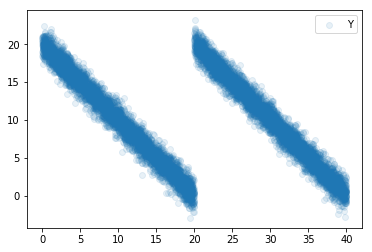

In [135]:
plt.scatter(X, Y, data=df, alpha=.1)
plt.legend('Y')

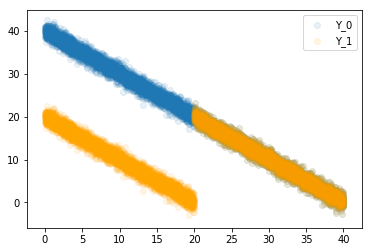

In [136]:
plt.scatter(X, Y_0, data=df, alpha=.1)
plt.scatter(X, Y_1, data=df, alpha=.1, c='orange')
plt.legend(['Y_0', 'Y_1'])

In [103]:
Z = np.random.normal(size=units) #Confounder, eg anxiety

In [53]:
Z

array([-0.69645391, -0.37126034, -1.286179  , ...,  1.33193373,
        1.79991519, -0.644924  ])

Wrong type of process! This is not time series data!

In [49]:
units = 1000
years = 40 #Years of seniority
t_pr = 20 #Time of discontinuity
delta = -20 #Effect size of having < t_pr years seniority

Z = np.random.normal(size=units) #Indivdual variation

a_trend = np.arange(years, 0, -1)
a_trend += np.array([delta] * t_pr + [0] * (years - t_pr)) #Discontinuity
individual_effects = Z
A_trend = np.tile(a_trend, units).reshape(units, years)
A_indiv = np.tile(individual_effects, years).reshape(years, units).T

Y_0 = A_trend + A_indiv

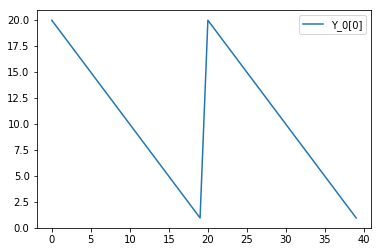

In [51]:
pd.DataFrame({'Y_0[0]': Y_0[0]}).plot()